In [1]:
def print_info(tensor):
    print("dtype : ", tensor.dtype)
    print("element \n", tensor)
    print("dimension : ", tensor.ndim)
    print("shape : ", tensor.shape)
    

## 2D image data

In [2]:
import os
import imageio.v2 as imageio
import torch

# PYTORCH IMAGE SHAPE MANAGEMENT RULE

| Data Type        | Data Size | Number of Channels | Depth | Height | Width | Features | Hours | Frequency | Time |
|------------------|-----------|--------------------|-------|--------|-------|----------|-------|-----------|------|
| IMAGES           | N         | C                  |      | H      |  W     |          |       |           |      |
| 3D IMAGES        | N         | C (usually 1)      | D     | H      | W     |          |       |           |      |
| TABULAR DATA     | N         |                    |       |        |       | F        |       |           |      |
| TIME SERIES DATA | N         |                    |       |        |       | F        | L     |           |      |
| AUDIO DATA       | N         | C                  |       |        |       |          |       |           | L    |
| AUDIO DATA (F,T) | N         | C                  |       |        |       |          |       | F         | T    |
| VIDEO DATA       | N         | C                  |       | H      | W     |          |       |           | T    |


# 2D IAMGE

In [3]:
img_arr = imageio.imread(os.path.join(os.path.pardir,os.path.pardir, "_00_data", "a_image-dog", "bobby.jpg"))
print(type(img_arr))
print(img_arr.shape)
print(img_arr.dtype)

img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
print(out.shape)

#result of out.shape
# 3 : channel
# 720 & 1280 : Resulotion

<class 'numpy.ndarray'>
(720, 1280, 3)
uint8
torch.Size([3, 720, 1280])


In [4]:
data_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")
filenames = [
  name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png'
]
print(filenames)

['cat1.png', 'cat2.png', 'cat3.png']


In [5]:
from PIL import Image

In [6]:
for i, filename in enumerate(filenames):
  image = Image.open(os.path.join(data_dir, filename))
  image.show()

batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

for i, filename in enumerate(filenames):
  img_arr = imageio.imread(os.path.join(data_dir, filename))
  img_t = torch.from_numpy(img_arr)
  img_t = img_t.permute(2, 0, 1)
  img_t = img_t[:3] #sometime images also have an alpha channel indicating transparency
  batch[i] = img_t

print(batch.shape)

torch.Size([3, 3, 256, 256])


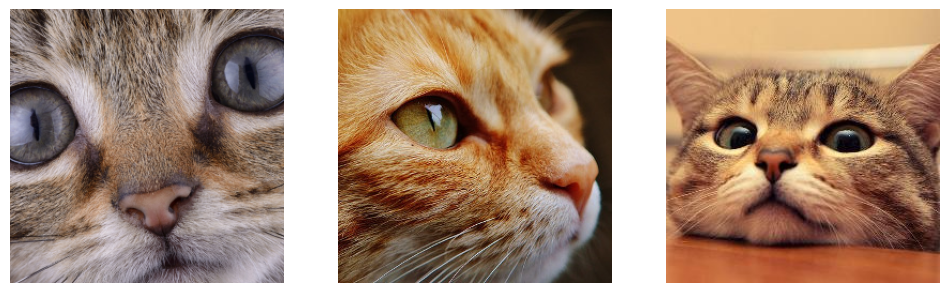

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined and loaded the 'batch' tensor
# batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

# Function to display images in a grid
def show_images(images, n_cols=3):
    n_rows = (len(images) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img = images[i].permute(1, 2, 0).numpy()  # Change tensor format to (H, W, C)
            ax.imshow(img)
            ax.axis('off')
    plt.show()

# Show the batch of images
show_images(batch)


Reshaping to make sence with pytorch image shaping rule 
> image : N, C, H, W

In [8]:
batch = batch.float()
batch /= 255.0
print(batch.dtype)
print(batch.shape)

n_channels = batch.shape[1]


#calculating each channel of unique value
for c in range(n_channels):
  mean = torch.mean(batch[:, c])
  std = torch.std(batch[:, c])
  batch[:, c] = (batch[:, c] - mean) / std

torch.float32
torch.Size([3, 3, 256, 256])


### Q.when we use ```batch[:, c] = (batch[:, c] - mean) / std``` this code, what will be retured? 

### A. It will be rturend uqnie vaules depend on each channels

### test code

In [9]:
batch.size()

torch.Size([3, 3, 256, 256])

In [10]:
test1 = torch.randn(size = (3,3,2,2))

In [11]:
test1

tensor([[[[-1.2894,  0.9748],
          [ 0.3166, -0.1606]],

         [[ 1.7129, -0.3298],
          [ 0.5873, -0.5632]],

         [[ 0.6718,  1.4116],
          [ 2.8140, -0.6122]]],


        [[[ 2.0254, -0.7147],
          [-0.7182,  0.6451]],

         [[-0.0281,  0.6962],
          [-0.4239, -0.6515]],

         [[-0.1510,  0.1543],
          [ 0.9698, -0.8875]]],


        [[[-0.2623,  1.6117],
          [ 0.2421,  0.0796]],

         [[-0.8930,  2.0048],
          [ 0.5525,  0.4490]],

         [[-0.3550,  0.5148],
          [ 0.0976, -1.4220]]]])

In [12]:
test1[:,0]

tensor([[[-1.2894,  0.9748],
         [ 0.3166, -0.1606]],

        [[ 2.0254, -0.7147],
         [-0.7182,  0.6451]],

        [[-0.2623,  1.6117],
         [ 0.2421,  0.0796]]])

In [13]:
test1[0,:]

tensor([[[-1.2894,  0.9748],
         [ 0.3166, -0.1606]],

        [[ 1.7129, -0.3298],
         [ 0.5873, -0.5632]],

        [[ 0.6718,  1.4116],
         [ 2.8140, -0.6122]]])

what if it will returned depend on each image, it will return like `test1[0,:]` result but it returend result of `test1[:,0]`. the return value corresonpdingly will be each channel mean, std, etc values

# 3D Image Data

#### 3D data structure : N, C, D, H, W

In [14]:
dir_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "c_volumetric-dicom", "2-LUNG_3.0_B70f-04083")
vol_array = imageio.volread(dir_path, format='DICOM')

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


In [15]:
print(type(vol_array))

<class 'imageio.core.util.Array'>


In [16]:
print(vol_array.shape)

(99, 512, 512)


In [17]:
print(vol_array.dtype)

int16


In [18]:
print(vol_array[0])

[[ -985  -990  -999 ... -1017 -1008  -971]
 [-1016  -984  -963 ... -1000 -1009  -999]
 [-1024 -1008  -996 ...  -979 -1021  -987]
 ...
 [ -920  -942  -944 ...  -893  -917  -955]
 [ -871  -879  -905 ...  -895  -869  -867]
 [ -876  -855  -873 ...  -933  -982  -936]]


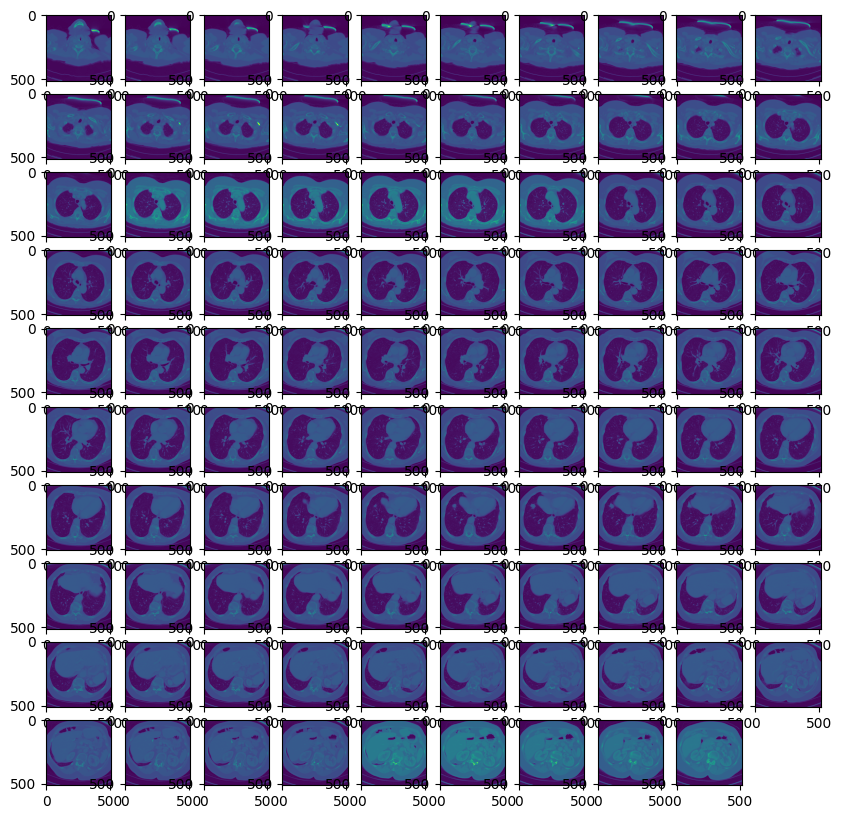

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for id in range(0, 99):
  fig.add_subplot(10, 10, id + 1)
  plt.imshow(vol_array[id])
plt.show()

### Q. why 3D image Structure couldn't following N,C,D,H,W rule?

### A. because it is original dicom value. structure of D,H,W so we have to preprocess to fit the rule as like 2d image reshaping

1. firstly, we have to modify data type to numpy.float

In [20]:
vol = torch.from_numpy(vol_array).float()
print_info(vol)

dtype :  torch.float32
element 
 tensor([[[ -985.,  -990.,  -999.,  ..., -1017., -1008.,  -971.],
         [-1016.,  -984.,  -963.,  ..., -1000., -1009.,  -999.],
         [-1024., -1008.,  -996.,  ...,  -979., -1021.,  -987.],
         ...,
         [ -920.,  -942.,  -944.,  ...,  -893.,  -917.,  -955.],
         [ -871.,  -879.,  -905.,  ...,  -895.,  -869.,  -867.],
         [ -876.,  -855.,  -873.,  ...,  -933.,  -982.,  -936.]],

        [[ -982.,  -989., -1020.,  ...,  -988.,  -977.,  -980.],
         [-1015.,  -969.,  -980.,  ...,  -981.,  -974., -1016.],
         [-1020.,  -978.,  -972.,  ...,  -988.,  -993., -1015.],
         ...,
         [ -880.,  -854.,  -924.,  ...,  -909.,  -829.,  -829.],
         [ -907.,  -868.,  -928.,  ...,  -909.,  -901.,  -894.],
         [ -885.,  -850.,  -899.,  ...,  -977.,  -964.,  -991.]],

        [[-1022., -1011.,  -983.,  ..., -1013.,  -980.,  -967.],
         [-1022., -1005., -1012.,  ...,  -948.,  -966., -1008.],
         [ -991.,  -965.,

2. secondly we have to add new channel commonly use 1

In [21]:
vol = torch.unsqueeze(vol, 0)  # channel
print_info(vol)

dtype :  torch.float32
element 
 tensor([[[[ -985.,  -990.,  -999.,  ..., -1017., -1008.,  -971.],
          [-1016.,  -984.,  -963.,  ..., -1000., -1009.,  -999.],
          [-1024., -1008.,  -996.,  ...,  -979., -1021.,  -987.],
          ...,
          [ -920.,  -942.,  -944.,  ...,  -893.,  -917.,  -955.],
          [ -871.,  -879.,  -905.,  ...,  -895.,  -869.,  -867.],
          [ -876.,  -855.,  -873.,  ...,  -933.,  -982.,  -936.]],

         [[ -982.,  -989., -1020.,  ...,  -988.,  -977.,  -980.],
          [-1015.,  -969.,  -980.,  ...,  -981.,  -974., -1016.],
          [-1020.,  -978.,  -972.,  ...,  -988.,  -993., -1015.],
          ...,
          [ -880.,  -854.,  -924.,  ...,  -909.,  -829.,  -829.],
          [ -907.,  -868.,  -928.,  ...,  -909.,  -901.,  -894.],
          [ -885.,  -850.,  -899.,  ...,  -977.,  -964.,  -991.]],

         [[-1022., -1011.,  -983.,  ..., -1013.,  -980.,  -967.],
          [-1022., -1005., -1012.,  ...,  -948.,  -966., -1008.],
         

3. and last, it will be finished after add new dimension for data size

In [22]:
vol = torch.unsqueeze(vol, 0)  # data size
print_info(vol)

dtype :  torch.float32
element 
 tensor([[[[[ -985.,  -990.,  -999.,  ..., -1017., -1008.,  -971.],
           [-1016.,  -984.,  -963.,  ..., -1000., -1009.,  -999.],
           [-1024., -1008.,  -996.,  ...,  -979., -1021.,  -987.],
           ...,
           [ -920.,  -942.,  -944.,  ...,  -893.,  -917.,  -955.],
           [ -871.,  -879.,  -905.,  ...,  -895.,  -869.,  -867.],
           [ -876.,  -855.,  -873.,  ...,  -933.,  -982.,  -936.]],

          [[ -982.,  -989., -1020.,  ...,  -988.,  -977.,  -980.],
           [-1015.,  -969.,  -980.,  ...,  -981.,  -974., -1016.],
           [-1020.,  -978.,  -972.,  ...,  -988.,  -993., -1015.],
           ...,
           [ -880.,  -854.,  -924.,  ...,  -909.,  -829.,  -829.],
           [ -907.,  -868.,  -928.,  ...,  -909.,  -901.,  -894.],
           [ -885.,  -850.,  -899.,  ...,  -977.,  -964.,  -991.]],

          [[-1022., -1011.,  -983.,  ..., -1013.,  -980.,  -967.],
           [-1022., -1005., -1012.,  ...,  -948.,  -966., -1

In [23]:
print(vol.shape)  # >>> torch.Size([1, 1, 99, 512, 512])

torch.Size([1, 1, 99, 512, 512])


and normalized

In [24]:
mean = torch.mean(vol, dim=(3, 4), keepdim=True)
print(mean.shape)
std = torch.std(vol, dim=(3, 4), keepdim=True)
print(std.shape)
vol = (vol - mean) / std
print(vol.shape)

print(vol[0, 0, 0])

torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 1, 1])
torch.Size([1, 1, 99, 512, 512])
tensor([[-1.0002, -1.0102, -1.0283,  ..., -1.0645, -1.0464, -0.9720],
        [-1.0625, -0.9982, -0.9560,  ..., -1.0303, -1.0484, -1.0283],
        [-1.0785, -1.0464, -1.0223,  ..., -0.9881, -1.0725, -1.0042],
        ...,
        [-0.8696, -0.9138, -0.9178,  ..., -0.8153, -0.8636, -0.9399],
        [-0.7711, -0.7872, -0.8394,  ..., -0.8194, -0.7671, -0.7631],
        [-0.7812, -0.7390, -0.7752,  ..., -0.8957, -0.9941, -0.9017]])


# Tabular data 

### Tabular data structure : N X F

In [25]:
import csv
import numpy as np
import pandas as pd

In [26]:
wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

print_info(wineq_numpy)

dtype :  float32
element 
 [[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
dimension :  2
shape :  (4898, 12)


In [27]:
data = pd.DataFrame(wineq_numpy)
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.600000,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.000000,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.200000,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.100000,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [28]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
print(col_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [29]:
wineq = torch.from_numpy(wineq_numpy)
print_info(wineq)

dtype :  torch.float32
element 
 tensor([[ 7.0000,  0.2700,  0.3600,  ...,  0.4500,  8.8000,  6.0000],
        [ 6.3000,  0.3000,  0.3400,  ...,  0.4900,  9.5000,  6.0000],
        [ 8.1000,  0.2800,  0.4000,  ...,  0.4400, 10.1000,  6.0000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  0.4600,  9.4000,  6.0000],
        [ 5.5000,  0.2900,  0.3000,  ...,  0.3800, 12.8000,  7.0000],
        [ 6.0000,  0.2100,  0.3800,  ...,  0.3200, 11.8000,  6.0000]])
dimension :  2
shape :  torch.Size([4898, 12])


featrue values X

In [30]:
data = wineq[:, :-1]
print_info(data)

dtype :  torch.float32
element 
 tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]])
dimension :  2
shape :  torch.Size([4898, 11])


target values y

In [31]:
target = wineq[:, -1]
print_info(target)

dtype :  torch.float32
element 
 tensor([6., 6., 6.,  ..., 6., 7., 6.])
dimension :  1
shape :  torch.Size([4898])


transfer to int

In [32]:
target = target.long()
print_info(target)

dtype :  torch.int64
element 
 tensor([6, 6, 6,  ..., 6, 7, 6])
dimension :  1
shape :  torch.Size([4898])


 2-D tensor with ones on the diagonal and zeros

In [33]:
eye_matrix = torch.eye(10)

In [34]:
eye_matrix

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [35]:
pd.DataFrame(target)

,0
0,6
1,6
2,6
3,6
4,6
...,...
4893,6
4894,5
4895,6
4896,7


In [36]:
onehot_target = eye_matrix[target]
pd.DataFrame(onehot_target)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4893,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4894,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4895,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


normalize

In [37]:
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data = (data - data_mean) / torch.sqrt(data_var)
print(data)

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

torch.Size([3918, 11])
torch.Size([3918, 10])
torch.Size([980, 11])
torch.Size([980, 10])


In [39]:
def get_wine_data():
  wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
  wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

  wineq = torch.from_numpy(wineq_numpy)

  data = wineq[:, :-1]  # Selects all rows and all columns except the last
  target = wineq[:, -1].long()  # treat labels as an integer

  eye_matrix = torch.eye(10)
  onehot_target = eye_matrix[target]

  data_mean = torch.mean(data, dim=0)
  data_var = torch.var(data, dim=0)
  data = (data - data_mean) / torch.sqrt(data_var)

  X_train, X_valid, y_train, y_valid = train_test_split(data, onehot_target, test_size=0.2)

  return X_train, X_valid, y_train, y_valid

Example of Train with MLP

In [40]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Convert your data and labels to PyTorch tensors
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_valid = torch.Tensor(X_valid)
y_valid = torch.Tensor(y_valid)

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.activation_function = nn.ReLU()  # Choose your activation function here
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.output_layer = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation_function(x)
        x = self.layer2(x)
        x = self.activation_function(x)  # You can apply the activation function again if needed
        x = self.output_layer(x)
        return x

def train_MLP(config):
    learning_rate = config['learning_rate']
    num_epoch = config['num_epoch']
    print_loss_interval = 20

    input_size = X_train.shape[1]
    hidden_size1 = 1959  # You can change this as needed
    hidden_size2 = 10  # You can change this as needed
    output_size = y_train.shape[1]

    model = MLP(input_size, hidden_size1, hidden_size2, output_size)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification tasks

    for epoch in range(num_epoch):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, torch.argmax(y_train, dim=1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % print_loss_interval == 0:
            print(f"[Epoch {epoch + 1}/{num_epoch}] Loss: {loss.item()}")

    return model

# Define your configuration
config = {
    'learning_rate': 0.01,
    'num_epoch': 100,
}

# Train the model
trained_model = train_MLP(config)


[Epoch 20/100] Loss: 2.046851873397827
[Epoch 40/100] Loss: 1.706335186958313
[Epoch 60/100] Loss: 1.4936764240264893
[Epoch 80/100] Loss: 1.373581886291504
[Epoch 100/100] Loss: 1.3090921640396118


In [41]:
from sklearn.datasets import fetch_california_housing

In [42]:
housing = fetch_california_housing()
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [43]:
print(type(housing.data))
print(housing.data.dtype)
print(housing.data.shape)
print(housing.feature_names)

<class 'numpy.ndarray'>
float64
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [44]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

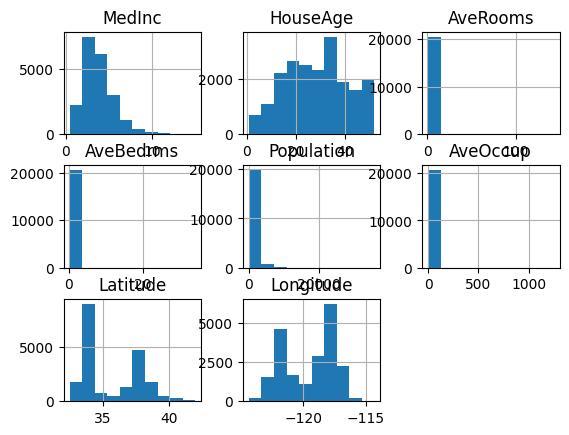

In [45]:
housing_df.hist()

In [46]:
print('original values')
print(' min value : ' , housing.data.min(),'\n', 'max value : ', housing.data.max())

original values
 min value :  -124.35 
 max value :  35682.0


In [47]:
data_mean = np.mean(housing.data, axis=0)
data_var = np.var(housing.data, axis=0)
data = (housing.data - data_mean) / np.sqrt(data_var)
target = housing.target

In [48]:
print("normalized value")
print(' min value : ' , data.min(),'\n', 'max value : ', data.max())

normalized value
 min value :  -2.3859923416733877 
 max value :  119.41910318829312


In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2)

X_train = torch.from_numpy(X_train)
X_valid = torch.from_numpy(X_valid)
y_train = torch.from_numpy(y_train)
y_valid = torch.from_numpy(y_valid)

print("===train===")
print(X_train.shape)
print(y_train.shape)

print("===valid===")
print(X_valid.shape)
print(y_valid.shape)


===train===
torch.Size([16512, 8])
torch.Size([16512])
===valid===
torch.Size([4128, 8])
torch.Size([4128])


# Time Series data

### Times Series Data Structure : N x F x L

In [50]:
torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

In [51]:
bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

bikes_numpy = np.loadtxt(
  fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
  converters={
    1: lambda x: float(x[8:10])  # 2011-01-07 --> 07 --> 7
  }
)

#delimiter: This parameter specifies the character used to separate values in the data file. 
#skiprows: This parameter tells NumPy how many initial rows to skip when loading the data. 
#converters: This parameter allows you to specify functions that are applied to specific 
#           columns during data loading.

In [52]:
bikes = torch.from_numpy(bikes_numpy)

In [53]:
print_info(bikes)

dtype :  torch.float32
element 
 tensor([[1.0000e+00, 1.0000e+00,  ..., 1.3000e+01, 1.6000e+01],
        [2.0000e+00, 1.0000e+00,  ..., 3.2000e+01, 4.0000e+01],
        ...,
        [1.7378e+04, 3.1000e+01,  ..., 4.8000e+01, 6.1000e+01],
        [1.7379e+04, 3.1000e+01,  ..., 3.7000e+01, 4.9000e+01]])
dimension :  2
shape :  torch.Size([17520, 17])


In [54]:
print(bikes.shape[1])

17


In [55]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
# bikes.view(-1,24,17)

In [56]:
print_info(daily_bikes)

dtype :  torch.float32
element 
 tensor([[[1.0000e+00, 1.0000e+00,  ..., 1.3000e+01, 1.6000e+01],
         [2.0000e+00, 1.0000e+00,  ..., 3.2000e+01, 4.0000e+01],
         ...,
         [2.3000e+01, 1.0000e+00,  ..., 1.7000e+01, 2.8000e+01],
         [2.4000e+01, 1.0000e+00,  ..., 2.4000e+01, 3.9000e+01]],

        [[2.5000e+01, 2.0000e+00,  ..., 1.3000e+01, 1.7000e+01],
         [2.6000e+01, 2.0000e+00,  ..., 1.6000e+01, 1.7000e+01],
         ...,
         [4.6000e+01, 2.0000e+00,  ..., 9.0000e+00, 9.0000e+00],
         [4.7000e+01, 2.0000e+00,  ..., 8.0000e+00, 8.0000e+00]],

        ...,

        [[1.7332e+04, 3.0000e+01,  ..., 4.1000e+01, 4.1000e+01],
         [1.7333e+04, 3.0000e+01,  ..., 2.7000e+01, 2.8000e+01],
         ...,
         [1.7354e+04, 3.0000e+01,  ..., 3.0000e+01, 3.6000e+01],
         [1.7355e+04, 3.0000e+01,  ..., 3.9000e+01, 4.9000e+01]],

        [[1.7356e+04, 3.1000e+01,  ..., 3.0000e+01, 3.4000e+01],
         [1.7357e+04, 3.1000e+01,  ..., 1.3000e+01, 1.9000e+

In [57]:
daily_bikes_data = daily_bikes[:, :, :-1]
daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)


In [58]:
print_info(daily_bikes_data)

dtype :  torch.float32
element 
 tensor([[[1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01],
         [2.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01],
         ...,
         [2.3000e+01, 1.0000e+00,  ..., 1.1000e+01, 1.7000e+01],
         [2.4000e+01, 1.0000e+00,  ..., 1.5000e+01, 2.4000e+01]],

        [[2.5000e+01, 2.0000e+00,  ..., 4.0000e+00, 1.3000e+01],
         [2.6000e+01, 2.0000e+00,  ..., 1.0000e+00, 1.6000e+01],
         ...,
         [4.6000e+01, 2.0000e+00,  ..., 0.0000e+00, 9.0000e+00],
         [4.7000e+01, 2.0000e+00,  ..., 0.0000e+00, 8.0000e+00]],

        ...,

        [[1.7332e+04, 3.0000e+01,  ..., 0.0000e+00, 4.1000e+01],
         [1.7333e+04, 3.0000e+01,  ..., 1.0000e+00, 2.7000e+01],
         ...,
         [1.7354e+04, 3.0000e+01,  ..., 6.0000e+00, 3.0000e+01],
         [1.7355e+04, 3.0000e+01,  ..., 1.0000e+01, 3.9000e+01]],

        [[1.7356e+04, 3.1000e+01,  ..., 4.0000e+00, 3.0000e+01],
         [1.7357e+04, 3.1000e+01,  ..., 6.0000e+00, 1.3000e+

In [59]:
print_info(daily_bikes_target)

dtype :  torch.float32
element 
 tensor([[[16.],
         [40.],
         ...,
         [28.],
         [39.]],

        [[17.],
         [17.],
         ...,
         [ 9.],
         [ 8.]],

        ...,

        [[41.],
         [28.],
         ...,
         [36.],
         [49.]],

        [[34.],
         [19.],
         ...,
         [61.],
         [49.]]])
dimension :  3
shape :  torch.Size([730, 24, 1])


In [60]:
test = daily_bikes[:, :, -1]

In [61]:
print_info(test)

dtype :  torch.float32
element 
 tensor([[16., 40.,  ..., 28., 39.],
        [17., 17.,  ...,  9.,  8.],
        ...,
        [41., 28.,  ..., 36., 49.],
        [34., 19.,  ..., 61., 49.]])
dimension :  2
shape :  torch.Size([730, 24])


In [62]:
first_day_data = daily_bikes_data[0]
print_info(first_day_data)


dtype :  torch.float32
element 
 tensor([[ 1.,  1.,  ...,  3., 13.],
        [ 2.,  1.,  ...,  8., 32.],
        ...,
        [23.,  1.,  ..., 11., 17.],
        [24.,  1.,  ..., 15., 24.]])
dimension :  2
shape :  torch.Size([24, 16])


In [63]:
print(first_day_data[:, 9].long())

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])


In [64]:
print(first_day_data[:, 9].long().size())

#timeline of the day

torch.Size([24])


In [65]:
eye_matrix = torch.eye(4)
print_info(eye_matrix)

#weather value is 4 kind so torch.eye have to 4

dtype :  torch.float32
element 
 tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
dimension :  2
shape :  torch.Size([4, 4])


In [66]:
weather_onehot = eye_matrix[first_day_data[:, 9].long() - 1]
print_info(weather_onehot)

dtype :  torch.float32
element 
 tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])
dimension :  2
shape :  torch.Size([24, 4])


Q. why the shape will have to be 4? 

> A. to do for one hot encoding 

In [67]:
print_info(first_day_data)

dtype :  torch.float32
element 
 tensor([[ 1.,  1.,  ...,  3., 13.],
        [ 2.,  1.,  ...,  8., 32.],
        ...,
        [23.,  1.,  ..., 11., 17.],
        [24.,  1.,  ..., 15., 24.]])
dimension :  2
shape :  torch.Size([24, 16])


In [68]:
pd.DataFrame(first_day_data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0
1,2.0,1.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0
2,3.0,1.0,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0
3,4.0,1.0,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0
4,5.0,1.0,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0


In [69]:
print_info(weather_onehot)

dtype :  torch.float32
element 
 tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])
dimension :  2
shape :  torch.Size([24, 4])


In [70]:
pd.DataFrame(weather_onehot).head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [71]:
first_day_data_torch = torch.cat(tensors=(first_day_data, weather_onehot), dim=1)
print_info(first_day_data_torch)

dtype :  torch.float32
element 
 tensor([[ 1.,  1.,  ...,  0.,  0.],
        [ 2.,  1.,  ...,  0.,  0.],
        ...,
        [23.,  1.,  ...,  0.,  0.],
        [24.,  1.,  ...,  0.,  0.]])
dimension :  2
shape :  torch.Size([24, 20])


In [72]:
pd.DataFrame(first_day_data_torch).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,1.0,0.0,0.0,0.0
1,2.0,1.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,1.0,0.0,0.0,0.0
2,3.0,1.0,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,1.0,0.0,0.0,0.0
3,4.0,1.0,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,1.0,0.0,0.0,0.0
4,5.0,1.0,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [73]:
day_data_torch_list = []

In [74]:
for daily_idx in range(daily_bikes_data.shape[0]):  # range(730)
  day = daily_bikes_data[daily_idx]  # day.shape: [24, 17]
  weather_onehot = eye_matrix[day[:, 9].long() - 1]
  day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # day_torch.shape: [24, 21]
  day_data_torch_list.append(day_data_torch)
  
  # one hot encoding -> concat -> add data

In [75]:
print(len(day_data_torch_list))
daily_bikes_data = torch.stack(day_data_torch_list, dim=0)
print(daily_bikes_data.shape)

730
torch.Size([730, 24, 20])


In [76]:
#Review

print(daily_bikes_data[:, :, :9].shape, daily_bikes_data[:, :, 10:].shape)
daily_bikes_data = torch.cat(
  [daily_bikes_data[:, :, :9], daily_bikes_data[:, :, 10:]],
  dim=2
)
print(daily_bikes_data.shape)

temperatures = daily_bikes_data[:, :, 9]
daily_bikes_data[:, :, 9] = (daily_bikes_data[:, :, 9] - torch.mean(temperatures)) / torch.std(temperatures)

print("before reshaping : " ,daily_bikes_data.shape)
daily_bikes_data = daily_bikes_data.transpose(1, 2)
print("after reshaping : " ,daily_bikes_data.shape)  # >>> torch.Size([730, 17, 24])

torch.Size([730, 24, 9]) torch.Size([730, 24, 10])
torch.Size([730, 24, 19])
before reshaping :  torch.Size([730, 24, 19])
after reshaping :  torch.Size([730, 19, 24])


In [77]:
#Review

print(daily_bikes_data[:, :, :9].shape, daily_bikes_data[:, :, 10:].shape)
daily_bikes_data = torch.cat(
  [daily_bikes_data[:, :, :9], daily_bikes_data[:, :, 10:]],
  dim=2
)
print(daily_bikes_data.shape)

temperatures = daily_bikes_data[:, :, 9]
daily_bikes_data[:, :, 9] = (daily_bikes_data[:, :, 9] - torch.mean(temperatures)) / torch.std(temperatures)

daily_bikes_data = daily_bikes_data.transpose(1, 2)
print(daily_bikes_data.shape)  # >>> torch.Size([730, 17, 24])

torch.Size([730, 19, 9]) torch.Size([730, 19, 14])
torch.Size([730, 19, 23])
torch.Size([730, 23, 19])


# Audio Data

### Audio Data Structure

#### - N X C X L 
#### - N X C X F X T

In [78]:
import scipy.io.wavfile as wavfile

In [79]:
audio_1_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100038-A-14.wav")
audio_2_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "f_audio-chirp", "1-100210-A-36.wav")

freq_1, waveform_arr_1 = wavfile.read(audio_1_path)
print(freq_1)
print(type(waveform_arr_1))
print(len(waveform_arr_1))
print(waveform_arr_1)



44100
<class 'numpy.ndarray'>
220500
[ -388 -3387 -4634 ...  2289  1327    90]


In [80]:
freq_2, waveform_arr_2 = wavfile.read(audio_2_path)

waveform = torch.empty(2, 1, 220_500)
print_info(waveform)

dtype :  torch.float32
element 
 tensor([[[0., 0.,  ..., 0., 0.]],

        [[0., 0.,  ..., 0., 0.]]])
dimension :  3
shape :  torch.Size([2, 1, 220500])


In [81]:
waveform[0, 0] = torch.from_numpy(waveform_arr_1).float()
print_info(waveform[0,0])
print("")
print_info(waveform)

dtype :  torch.float32
element 
 tensor([ -388., -3387.,  ...,  1327.,    90.])
dimension :  1
shape :  torch.Size([220500])

dtype :  torch.float32
element 
 tensor([[[ -388., -3387.,  ...,  1327.,    90.]],

        [[    0.,     0.,  ...,     0.,     0.]]])
dimension :  3
shape :  torch.Size([2, 1, 220500])


In [82]:
waveform[1, 0] = torch.from_numpy(waveform_arr_2).float()
print_info(waveform[1,0])
print("")
print_info(waveform)

dtype :  torch.float32
element 
 tensor([ -228.,  -410.,  ...,  -287., -9471.])
dimension :  1
shape :  torch.Size([220500])

dtype :  torch.float32
element 
 tensor([[[ -388., -3387.,  ...,  1327.,    90.]],

        [[ -228.,  -410.,  ...,  -287., -9471.]]])
dimension :  3
shape :  torch.Size([2, 1, 220500])


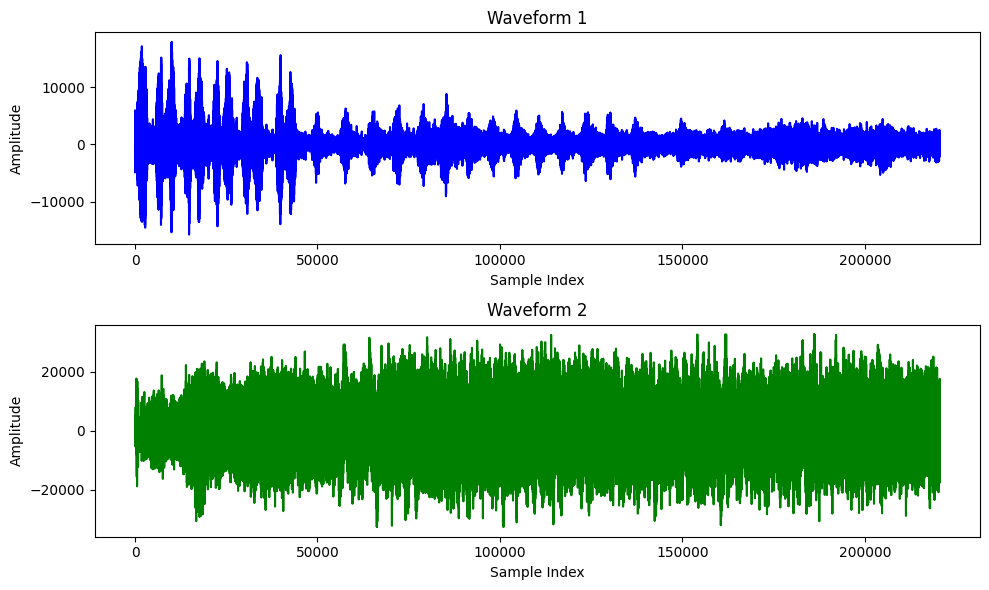

In [83]:
# Create a PyTorch tensor from the waveform arrays
waveform1 = torch.from_numpy(waveform_arr_1).float()
waveform2 = torch.from_numpy(waveform_arr_2).float()

# Create a figure and two subplots for the two waveforms
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot the first waveform
axs[0].plot(waveform1, color='blue')
axs[0].set_title('Waveform 1')
axs[0].set_xlabel('Sample Index')
axs[0].set_ylabel('Amplitude')

# Plot the second waveform
axs[1].plot(waveform2, color='green')
axs[1].set_title('Waveform 2')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Amplitude')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Signal

In [84]:
from scipy import signal

_, _, sp_arr_1 = signal.spectrogram(waveform_arr_1, freq_1)
_, _, sp_arr_2 = signal.spectrogram(waveform_arr_2, freq_2)

In [85]:
print(type(sp_arr_1))

<class 'numpy.ndarray'>


In [86]:
pd.DataFrame(sp_arr_1)


,0,1,2,3,4,5,6,7,8,9,...,974,975,976,977,978,979,980,981,982,983
0,4.351734,1.404353,2.786523e-04,14.466438,5.043998e-01,3.365977e+01,4.165004e+00,5.514575e+00,1.573292e+02,6.068393e+00,...,0.602275,5.920747e-01,1.058843e+00,1.086009e+00,2.379593,2.482530e+01,1.130566e+00,1.326061e-01,8.466105e-03,7.748725
1,44.579258,3.318574,5.358178e+00,8.325878,1.324378e+01,4.895676e+01,3.977267e+01,4.587582e+01,1.673023e+01,6.480633e+00,...,29.980770,2.357756e+01,2.392695e+01,1.240906e+01,23.606255,3.712733e+01,2.701503e+01,2.780231e+01,1.288926e+01,16.912394
2,95.455406,29.964157,7.688149e+01,152.369720,2.199985e+00,3.598869e+00,1.761979e+02,7.126803e+01,1.928436e+02,6.948445e+00,...,134.435699,2.498091e+01,1.293664e+02,8.737119e+00,14.812325,4.541383e+01,8.761433e+01,2.801817e+01,2.515461e+01,160.940170
3,75.917366,143.518677,3.276838e+01,54.578545,1.049641e+02,3.505788e+01,9.126649e+01,3.500813e+02,9.383891e+01,1.560275e+02,...,15.513682,1.307442e+02,9.562833e+01,2.616860e+02,282.651733,3.978081e+01,2.697138e+02,1.206918e+02,9.082800e+01,47.550507
4,34.343719,12.979283,2.856086e+01,29.222595,1.819630e+02,1.297462e+02,1.011526e+02,1.011059e+02,6.250147e+01,1.553968e+02,...,8.089217,9.293524e+01,3.138571e+02,8.407137e+02,546.994934,1.641055e+02,5.115047e+02,3.161679e+02,2.613327e+02,167.384781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.000002,0.000004,4.747061e-06,0.000004,4.870731e-06,6.570675e-06,8.918683e-06,7.404455e-06,4.697042e-06,1.025356e-05,...,0.000002,3.379403e-06,8.739002e-07,3.384787e-07,0.000004,8.967580e-06,7.543872e-07,1.991788e-06,6.074144e-06,0.000001
125,0.000012,0.000007,3.980102e-06,0.000007,7.651005e-07,2.458201e-06,5.007586e-06,2.876002e-06,7.887600e-06,6.492233e-09,...,0.000009,1.869502e-06,6.834622e-06,2.090006e-06,0.000011,9.560083e-07,5.178039e-06,3.266763e-07,5.033392e-06,0.000003
126,0.000002,0.000001,1.141279e-05,0.000004,7.072403e-06,3.834488e-07,1.010005e-06,6.290481e-06,3.867294e-06,9.496669e-07,...,0.000006,5.142618e-07,3.719247e-06,8.640817e-06,0.000002,3.694028e-06,2.187459e-07,3.578858e-06,4.281570e-06,0.000007
127,0.000002,0.000001,9.222971e-07,0.000002,6.651730e-06,5.506730e-06,1.395347e-05,3.039641e-05,1.531500e-06,1.164408e-06,...,0.000004,4.686303e-07,7.205057e-06,9.193933e-06,0.000003,6.699971e-07,3.440751e-07,7.978693e-07,1.831412e-06,0.000001


In [87]:
print(type(sp_arr_2))

<class 'numpy.ndarray'>


In [88]:
pd.DataFrame(sp_arr_2)


,0,1,2,3,4,5,6,7,8,9,...,974,975,976,977,978,979,980,981,982,983
0,3.582704e+02,1.193585e+03,9616.863281,2.260444e+03,8.214289e+02,1291.198608,1.585511e+02,1.007452e+03,3.853117e+01,6.672418e+02,...,3.520164,2115.577393,134.509689,10.284163,812.685120,2526.275391,2.168901e+03,342.165955,5.118986e+01,114.986031
1,1.066304e+04,2.470927e+04,27083.255859,2.489826e+04,5.136400e+03,24460.603516,8.295648e+03,7.922833e+03,7.050291e+04,5.064359e+04,...,8081.030762,27283.466797,12154.352539,91664.859375,98320.625000,5257.829590,4.719559e+03,3649.723633,1.795792e+04,2618.099121
2,4.857261e+02,1.022708e+05,407811.625000,2.861519e+05,5.947610e+02,431.407532,1.476716e+04,2.473203e+04,1.017364e+05,5.385750e+03,...,11550.913086,35796.042969,6372.618164,5180.824707,2619.150879,1183.382080,2.012175e+04,3786.477539,3.795060e+02,3368.395996
3,3.314021e+03,1.333603e+05,47352.203125,1.201185e+04,8.087785e+03,3023.851807,4.342913e+02,1.071181e+04,1.360060e+04,2.912620e+04,...,33582.312500,2029.802246,30385.894531,16841.748047,2783.989502,15815.383789,2.826376e+04,44550.117188,1.135276e+02,777.187256
4,9.764861e+03,2.815547e+04,6415.036133,2.300818e+04,3.982395e+03,3096.830811,3.202147e+03,2.324363e+03,2.417651e+03,1.137768e+03,...,6538.191406,4106.172852,23373.855469,14100.115234,1568.708740,5282.025391,4.825082e+03,5616.222168,2.337811e+03,8375.982422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,4.755089e-07,4.511533e-06,0.000002,7.002754e-07,4.207210e-06,0.000003,2.004010e-06,2.994260e-06,2.497249e-07,1.252130e-06,...,0.033209,0.011469,0.000506,0.000040,0.000008,0.000003,7.598996e-06,0.000030,2.450527e-05,0.091923
125,4.059466e-07,8.706797e-07,0.000005,1.880078e-06,1.019471e-06,0.000004,2.341776e-06,2.207860e-06,1.756071e-06,3.176541e-06,...,0.011608,0.003002,0.000194,0.000039,0.000034,0.000003,1.151489e-06,0.000015,3.763064e-05,0.661729
126,8.423510e-06,9.090959e-07,0.000012,6.777656e-06,1.113781e-05,0.000003,5.133233e-06,1.115632e-06,2.633107e-06,5.329749e-07,...,0.005129,0.000914,0.000165,0.000046,0.000010,0.000004,2.539928e-05,0.000002,3.435504e-06,1.265050
127,8.944371e-06,6.983850e-06,0.000004,2.286058e-07,1.657444e-05,0.000003,4.396433e-06,2.295274e-07,3.639865e-06,9.798286e-06,...,0.001347,0.000451,0.000063,0.000020,0.000009,0.000004,3.631890e-06,0.000017,5.677291e-06,0.670401


In [89]:
sp_1 = torch.from_numpy(sp_arr_1)
sp_2 = torch.from_numpy(sp_arr_2)

In [90]:
print_info(sp_1)

dtype :  torch.float32
element 
 tensor([[4.3517e+00, 1.4044e+00,  ..., 8.4661e-03, 7.7487e+00],
        [4.4579e+01, 3.3186e+00,  ..., 1.2889e+01, 1.6912e+01],
        ...,
        [2.1429e-06, 1.4071e-06,  ..., 1.8314e-06, 1.0062e-06],
        [5.5598e-06, 3.1114e-06,  ..., 6.3296e-07, 2.6184e-06]])
dimension :  2
shape :  torch.Size([129, 984])


In [91]:
print_info(sp_2)

dtype :  torch.float32
element 
 tensor([[3.5827e+02, 1.1936e+03,  ..., 5.1190e+01, 1.1499e+02],
        [1.0663e+04, 2.4709e+04,  ..., 1.7958e+04, 2.6181e+03],
        ...,
        [8.9444e-06, 6.9838e-06,  ..., 5.6773e-06, 6.7040e-01],
        [4.9058e-07, 1.4259e-07,  ..., 8.7142e-07, 2.3894e-03]])
dimension :  2
shape :  torch.Size([129, 984])


In [92]:
sp_left_t = torch.from_numpy(sp_arr_1)
print_info(sp_left_t)

dtype :  torch.float32
element 
 tensor([[4.3517e+00, 1.4044e+00,  ..., 8.4661e-03, 7.7487e+00],
        [4.4579e+01, 3.3186e+00,  ..., 1.2889e+01, 1.6912e+01],
        ...,
        [2.1429e-06, 1.4071e-06,  ..., 1.8314e-06, 1.0062e-06],
        [5.5598e-06, 3.1114e-06,  ..., 6.3296e-07, 2.6184e-06]])
dimension :  2
shape :  torch.Size([129, 984])


In [93]:
sp_right_t = torch.from_numpy(sp_arr_1)
print_info(sp_right_t)


dtype :  torch.float32
element 
 tensor([[4.3517e+00, 1.4044e+00,  ..., 8.4661e-03, 7.7487e+00],
        [4.4579e+01, 3.3186e+00,  ..., 1.2889e+01, 1.6912e+01],
        ...,
        [2.1429e-06, 1.4071e-06,  ..., 1.8314e-06, 1.0062e-06],
        [5.5598e-06, 3.1114e-06,  ..., 6.3296e-07, 2.6184e-06]])
dimension :  2
shape :  torch.Size([129, 984])


In [94]:
sp_t = torch.stack((sp_left_t, sp_right_t), dim=0).unsqueeze(dim=0)
print_info(sp_t)

dtype :  torch.float32
element 
 tensor([[[[4.3517e+00, 1.4044e+00,  ..., 8.4661e-03, 7.7487e+00],
          [4.4579e+01, 3.3186e+00,  ..., 1.2889e+01, 1.6912e+01],
          ...,
          [2.1429e-06, 1.4071e-06,  ..., 1.8314e-06, 1.0062e-06],
          [5.5598e-06, 3.1114e-06,  ..., 6.3296e-07, 2.6184e-06]],

         [[4.3517e+00, 1.4044e+00,  ..., 8.4661e-03, 7.7487e+00],
          [4.4579e+01, 3.3186e+00,  ..., 1.2889e+01, 1.6912e+01],
          ...,
          [2.1429e-06, 1.4071e-06,  ..., 1.8314e-06, 1.0062e-06],
          [5.5598e-06, 3.1114e-06,  ..., 6.3296e-07, 2.6184e-06]]]])
dimension :  4
shape :  torch.Size([1, 2, 129, 984])


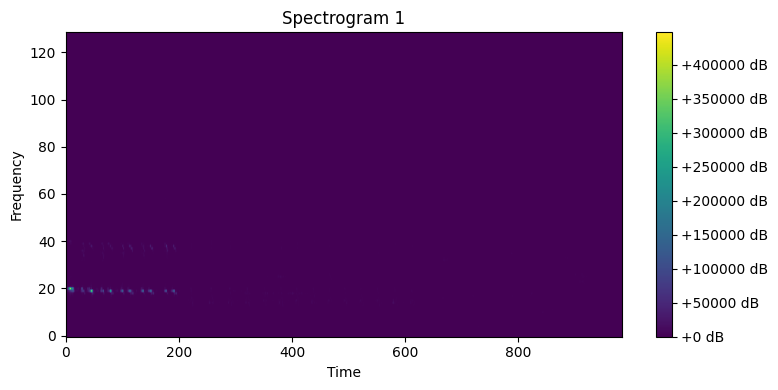

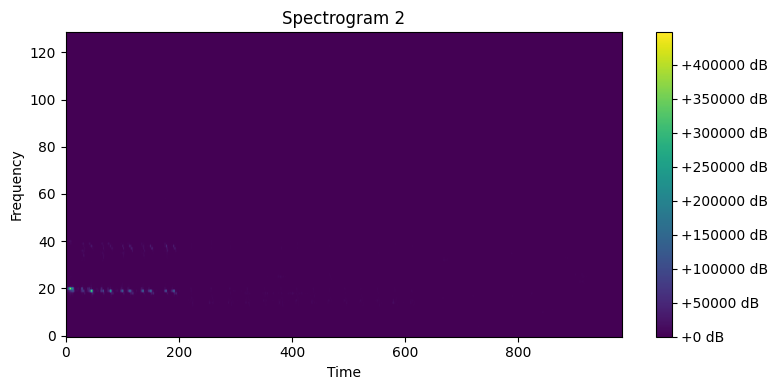

In [101]:
import matplotlib.pyplot as plt

# Assuming you have sp_t containing the spectrograms

# Convert the tensor to a numpy array
sp_arr = sp_t.squeeze().numpy()

# Plot each spectrogram
for i in range(sp_arr.shape[0]):
    plt.figure(figsize=(8, 4))  # Set the figure size as needed
    plt.imshow(sp_arr[i], cmap='viridis', aspect='auto', origin='lower')
    plt.title(f'Spectrogram {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()


# Video 

### Video Data Structure : N x C x H x W x T

In [102]:
import torch
import os
import imageio

video_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "g_video-cockatoo", "cockatoo.mp4")

reader = imageio.get_reader(video_path,'ffmpeg')
print(type(reader))
meta = reader.get_meta_data()
print(meta)

n_channels = 3
n_frames = 529
video = torch.empty(n_channels, n_frames, *meta['size'])
print(video.shape)

for i, frame in enumerate(reader):
  frame = torch.from_numpy(frame).float()  # frame.shape: [360, 480, 3]
  video[:, i] = torch.transpose(frame, 0, 2)

video = video.unsqueeze(dim=0)
print(video.shape)


<class 'imageio.plugins.ffmpeg.FfmpegFormat.Reader'>
{'plugin': 'ffmpeg', 'nframes': inf, 'ffmpeg_version': '6.0 built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)', 'codec': 'h264', 'pix_fmt': 'yuv420p(tv, bt709, progressive)', 'audio_codec': 'aac', 'fps': 29.53, 'source_size': (480, 360), 'size': (480, 360), 'rotate': 0, 'duration': 17.93}
torch.Size([3, 529, 480, 360])
torch.Size([1, 3, 529, 480, 360])


# Linear Regression 

In [103]:
from torch.utils.data import Dataset, DataLoader, random_split


class LinearRegressionDataset(Dataset):
  def __init__(self, N=50, m=-3, b=2, *args, **kwargs):
    # N: number of samples, e.g. 50
    # m: slope
    # b: offset
    super().__init__(*args, **kwargs)

    self.x = torch.rand(N, 2)
    self.noise = torch.rand(N) * 0.2
    self.m = m
    self.b = b
    self.y = (torch.sum(self.x * self.m) + self.b + self.noise).unsqueeze(-1)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return {'input': self.x[idx], 'target': self.y[idx]}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.x), self.x.shape, self.y.shape
    )
    return str

In [104]:
if __name__ == "__main__":
  linear_regression_dataset = LinearRegressionDataset()

  print(linear_regression_dataset)
  
  for idx, sample in enumerate(linear_regression_dataset):
      print("{0} - {1}: {2}".format(idx, sample['input'], sample['target']))
      
      train_dataset, validation_dataset, test_dataset = random_split(linear_regression_dataset, [0.7, 0.2, 0.1])

      print("#" * 50, 2)

      print(len(train_dataset), len(validation_dataset), len(test_dataset))

      print("#" * 50, 3)      
      
      train_data_loader = DataLoader(
      dataset=train_dataset,
      batch_size=4,
      shuffle=True
  )

Data Size: 50, Input Shape: torch.Size([50, 2]), Target Shape: torch.Size([50, 1])
0 - tensor([0.3957, 0.9485]): tensor([-157.1261])
################################################## 2
35 10 5
################################################## 3
1 - tensor([0.6979, 0.5702]): tensor([-156.9858])
################################################## 2
35 10 5
################################################## 3
2 - tensor([0.8658, 0.6757]): tensor([-157.0169])
################################################## 2
35 10 5
################################################## 3
3 - tensor([0.5077, 0.7582]): tensor([-157.1617])
################################################## 2
35 10 5
################################################## 3
4 - tensor([0.3440, 0.7996]): tensor([-157.1500])
################################################## 2
35 10 5
################################################## 3
5 - tensor([0.7229, 0.3649]): tensor([-157.1069])
###############################################

In [105]:
train_data_loader = DataLoader(
  dataset=train_dataset,
  batch_size=4,
  shuffle=True
)

for idx, batch in enumerate(train_data_loader):
  print("{0} - {1}: {2}".format(idx, batch['input'], batch['target']))


0 - tensor([[0.0404, 0.1429],
        [0.0680, 0.3353],
        [0.8362, 0.8539],
        [0.4875, 0.5424]]): tensor([[-156.9868],
        [-157.0100],
        [-157.0662],
        [-157.0356]])
1 - tensor([[0.3957, 0.9485],
        [0.6340, 0.6809],
        [0.1400, 0.2137],
        [0.5099, 0.1174]]): tensor([[-157.1261],
        [-156.9969],
        [-156.9990],
        [-156.9893]])
2 - tensor([[0.9003, 0.9154],
        [0.9974, 0.6032],
        [0.4790, 0.6477],
        [0.6485, 0.7438]]): tensor([[-157.0754],
        [-157.1169],
        [-156.9863],
        [-157.1279]])
3 - tensor([[0.2551, 0.8038],
        [0.3440, 0.7996],
        [0.8023, 0.9898],
        [0.4745, 0.7981]]): tensor([[-157.1602],
        [-157.1500],
        [-157.0660],
        [-156.9890]])
4 - tensor([[0.5589, 0.8312],
        [0.3561, 0.9376],
        [0.4556, 0.5610],
        [0.1808, 0.1784]]): tensor([[-157.0507],
        [-157.1763],
        [-156.9803],
        [-157.1595]])
5 - tensor([[0.8073, 0.44

In [106]:
len(train_data_loader)

9

In [107]:
batch['input']

tensor([[0.4402, 0.0320],
        [0.8658, 0.6757],
        [0.5804, 0.7626]])

batch mean, origin data set 35 will be seperate to 4 loaf

# 2d IMage dataset Dataloader

In [108]:
from torchvision import transforms

In [109]:
class DogCat2DImageDataset(Dataset):
  def __init__(self):
    self.image_transforms = transforms.Compose([
      transforms.Resize(size=(256, 256)),
      transforms.ToTensor()
    ])

    dogs_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "a_image-dog")
    cats_dir = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "b_image-cats")

    image_lst = [
      Image.open(os.path.join(dogs_dir, "bobby.jpg")),  # (1280, 720, 3)
      Image.open(os.path.join(cats_dir, "cat1.png")),  # (256, 256, 3)
      Image.open(os.path.join(cats_dir, "cat2.png")),  # (256, 256, 3)
      Image.open(os.path.join(cats_dir, "cat3.png"))  # (256, 256, 3)
    ]

    image_lst = [self.image_transforms(img) for img in image_lst]
    self.images = torch.stack(image_lst, dim=0)

    # 0: "dog", 1: "cat"
    self.image_labels = torch.tensor([[0], [1], [1], [1]])

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    return {'input': self.images[idx], 'target': self.image_labels[idx]}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.images), self.images.shape, self.image_labels.shape
    )
    return str



In [110]:
if __name__ == "__main__":
  # Create an instance of the DogCat2DImageDataset class
  dog_cat_2d_image_dataset = DogCat2DImageDataset()

  # Print information about the dataset using the __str__ method of the dataset class
  print(dog_cat_2d_image_dataset)

  # Print a separator to visually separate sections
  print("#" * 50, 1)

  # Loop through the dataset and print information about each sample
  for idx, sample in enumerate(dog_cat_2d_image_dataset):
    print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target']))

  # Split the dataset into training and testing subsets
  train_dataset, test_dataset = random_split(dog_cat_2d_image_dataset, [0.7, 0.3])

  # Print a separator to visually separate sections
  print("#" * 50, 2)

  # Print the lengths of the training and testing datasets
  print(len(train_dataset), len(test_dataset))

  # Print a separator to visually separate sections
  print("#" * 50, 3)

  # Create a DataLoader for the training dataset to enable batch processing
  train_data_loader = DataLoader(
    dataset=train_dataset,
    batch_size=2,
    shuffle=True
  )

  # Loop through the training DataLoader and print information about each batch
  for idx, batch in enumerate(train_data_loader):
    print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target']))


Data Size: 4, Input Shape: torch.Size([4, 3, 256, 256]), Target Shape: torch.Size([4, 1])
################################################## 1
0 - torch.Size([3, 256, 256]): tensor([0])
1 - torch.Size([3, 256, 256]): tensor([1])
2 - torch.Size([3, 256, 256]): tensor([1])
3 - torch.Size([3, 256, 256]): tensor([1])
################################################## 2
3 1
################################################## 3
0 - torch.Size([2, 3, 256, 256]): tensor([[1],
        [1]])
1 - torch.Size([1, 3, 256, 256]): tensor([[0]])


# Wine Data set Data loader

In [111]:
class WineDataset(Dataset):
  def __init__(self):
    # Load wine data from a CSV file
    wine_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "d_tabular-wine", "winequality-white.csv")
    wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
    wineq = torch.from_numpy(wineq_numpy)

    # Data Normalization: Subtract mean and divide by standard deviation
    data = wineq[:, :-1]  # Selects all rows and all columns except the last
    data_mean = torch.mean(data, dim=0)
    data_var = torch.var(data, dim=0)
    self.data = (data - data_mean) / torch.sqrt(data_var)

    # Data One-hot Encoding: Convert labels to one-hot encoding
    target = wineq[:, -1].long()  # Treat labels as integers
    eye_matrix = torch.eye(10)  # Create an identity matrix of size 10x10
    self.target = eye_matrix[target]  # Apply one-hot encoding to target labels

    # Assert that the lengths of data and target are the same
    assert len(self.data) == len(self.target)
    
  # Super method to override fundamental methods
  
  # Returns the length of the dataset
  def __len__(self):
    return len(self.data)

  # Returns a single data sample by index, including input features and target
  def __getitem__(self, idx):
    wine_feature = self.data[idx]  # Input features for a single data point
    wine_target = self.target[idx]  # Target label (one-hot encoded) for the data point
    return {'input': wine_feature, 'target': wine_target}

  # Returns a string representation of the dataset's size and shapes
  def __str__(self):
    str_repr = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.data), self.data.shape, self.target.shape
    )
    return str_repr

In [112]:
if __name__ == "__main__":
  # Create an instance of the WineDataset class
  wine_dataset = WineDataset()

  # Print information about the dataset using the __str__ method of the dataset class
  print(wine_dataset)


Data Size: 4898, Input Shape: torch.Size([4898, 11]), Target Shape: torch.Size([4898, 10])


In [113]:
#Loop through the dataset and print information about each sample, including input and target shapes
for idx, sample in enumerate(wine_dataset):
  print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

0 - torch.Size([11]): torch.Size([10])
1 - torch.Size([11]): torch.Size([10])
2 - torch.Size([11]): torch.Size([10])
3 - torch.Size([11]): torch.Size([10])
4 - torch.Size([11]): torch.Size([10])
5 - torch.Size([11]): torch.Size([10])
6 - torch.Size([11]): torch.Size([10])
7 - torch.Size([11]): torch.Size([10])
8 - torch.Size([11]): torch.Size([10])
9 - torch.Size([11]): torch.Size([10])
10 - torch.Size([11]): torch.Size([10])
11 - torch.Size([11]): torch.Size([10])
12 - torch.Size([11]): torch.Size([10])
13 - torch.Size([11]): torch.Size([10])
14 - torch.Size([11]): torch.Size([10])
15 - torch.Size([11]): torch.Size([10])
16 - torch.Size([11]): torch.Size([10])
17 - torch.Size([11]): torch.Size([10])
18 - torch.Size([11]): torch.Size([10])
19 - torch.Size([11]): torch.Size([10])
20 - torch.Size([11]): torch.Size([10])
21 - torch.Size([11]): torch.Size([10])
22 - torch.Size([11]): torch.Size([10])
23 - torch.Size([11]): torch.Size([10])
24 - torch.Size([11]): torch.Size([10])
25 - torch

In [114]:
# Print the lengths of the training, validation, and testing datasets
train_dataset, validation_dataset, test_dataset = random_split(wine_dataset, [0.7, 0.2, 0.1])
print(len(train_dataset), len(validation_dataset), len(test_dataset))


3429 980 489


In [115]:
# Create a DataLoader for the training dataset with a batch size of 32, shuffling, and dropping the last incomplete batch
train_data_loader = DataLoader(
  dataset=train_dataset,
  batch_size=32,
  shuffle=True,
  drop_last=True
)

# Loop through the training DataLoader and print information about each batch, including input and target shapes
for idx, batch in enumerate(train_data_loader):
  print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))


0 - torch.Size([32, 11]): torch.Size([32, 10])
1 - torch.Size([32, 11]): torch.Size([32, 10])
2 - torch.Size([32, 11]): torch.Size([32, 10])
3 - torch.Size([32, 11]): torch.Size([32, 10])
4 - torch.Size([32, 11]): torch.Size([32, 10])
5 - torch.Size([32, 11]): torch.Size([32, 10])
6 - torch.Size([32, 11]): torch.Size([32, 10])
7 - torch.Size([32, 11]): torch.Size([32, 10])
8 - torch.Size([32, 11]): torch.Size([32, 10])
9 - torch.Size([32, 11]): torch.Size([32, 10])
10 - torch.Size([32, 11]): torch.Size([32, 10])
11 - torch.Size([32, 11]): torch.Size([32, 10])
12 - torch.Size([32, 11]): torch.Size([32, 10])
13 - torch.Size([32, 11]): torch.Size([32, 10])
14 - torch.Size([32, 11]): torch.Size([32, 10])
15 - torch.Size([32, 11]): torch.Size([32, 10])
16 - torch.Size([32, 11]): torch.Size([32, 10])
17 - torch.Size([32, 11]): torch.Size([32, 10])
18 - torch.Size([32, 11]): torch.Size([32, 10])
19 - torch.Size([32, 11]): torch.Size([32, 10])
20 - torch.Size([32, 11]): torch.Size([32, 10])
21

In [116]:
pd.DataFrame(batch['target'])
#target values is matrix of one-hot-encoeded

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# california hosuing data

In [117]:

class CaliforniaHousingDataset(Dataset):
  def __init__(self):
    # Load the California housing dataset from scikit-learn
    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()
    
    # Normalize the data by subtracting the mean and dividing by the standard deviation
    data_mean = np.mean(housing.data, axis=0)
    data_var = np.var(housing.data, axis=0)
    self.data = torch.tensor((housing.data - data_mean) / np.sqrt(data_var), dtype=torch.float32)
    
    # Convert the target values to PyTorch tensors and add a dimension
    self.target = torch.tensor(housing.target, dtype=torch.float32).unsqueeze(dim=-1)

  # Define the length of the dataset
  def __len__(self):
    return len(self.data)

  # Retrieve a single data sample by index, including input features and target
  def __getitem__(self, idx):
    sample_data = self.data[idx]  # Input features for a single data point
    sample_target = self.target[idx]  # Target value for the data point
    return {'input': sample_data, 'target': sample_target}

  # Return a string representation of the dataset's size and shapes
  def __str__(self):
    str_repr = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.data), self.data.shape, self.target.shape
    )
    return str_repr

In [118]:
if __name__ == "__main__":
  # Create an instance of the CaliforniaHousingDataset class
  california_housing_dataset = CaliforniaHousingDataset()

  # Print information about the dataset using the __str__ method of the dataset class
  print(california_housing_dataset)

Data Size: 20640, Input Shape: torch.Size([20640, 8]), Target Shape: torch.Size([20640, 1])


In [119]:
# Loop through the dataset and print information about each sample, including input and target shapes
for idx, sample in enumerate(california_housing_dataset):
  print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

0 - torch.Size([8]): torch.Size([1])
1 - torch.Size([8]): torch.Size([1])
2 - torch.Size([8]): torch.Size([1])
3 - torch.Size([8]): torch.Size([1])
4 - torch.Size([8]): torch.Size([1])
5 - torch.Size([8]): torch.Size([1])
6 - torch.Size([8]): torch.Size([1])
7 - torch.Size([8]): torch.Size([1])
8 - torch.Size([8]): torch.Size([1])
9 - torch.Size([8]): torch.Size([1])
10 - torch.Size([8]): torch.Size([1])
11 - torch.Size([8]): torch.Size([1])
12 - torch.Size([8]): torch.Size([1])
13 - torch.Size([8]): torch.Size([1])
14 - torch.Size([8]): torch.Size([1])
15 - torch.Size([8]): torch.Size([1])
16 - torch.Size([8]): torch.Size([1])
17 - torch.Size([8]): torch.Size([1])
18 - torch.Size([8]): torch.Size([1])
19 - torch.Size([8]): torch.Size([1])
20 - torch.Size([8]): torch.Size([1])
21 - torch.Size([8]): torch.Size([1])
22 - torch.Size([8]): torch.Size([1])
23 - torch.Size([8]): torch.Size([1])
24 - torch.Size([8]): torch.Size([1])
25 - torch.Size([8]): torch.Size([1])
26 - torch.Size([8]): 

In [120]:
# Split the dataset into training, validation, and testing subsets with a 70-20-10 ratio
train_dataset, validation_dataset, test_dataset = random_split(california_housing_dataset, [0.7, 0.2, 0.1])

# Print the lengths of the training, validation, and testing datasets
print(len(train_dataset), len(validation_dataset), len(test_dataset))

14448 4128 2064


In [121]:
# Create a DataLoader for the training dataset with a batch size of 32, shuffling, and dropping the last incomplete batch
train_data_loader = DataLoader(
  dataset=train_dataset,
  batch_size=32,
  shuffle=True,
  drop_last=True
)

# Loop through the training DataLoader and print information about each batch, including input and target shapes
for idx, batch in enumerate(train_data_loader):
  print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

0 - torch.Size([32, 8]): torch.Size([32, 1])
1 - torch.Size([32, 8]): torch.Size([32, 1])
2 - torch.Size([32, 8]): torch.Size([32, 1])
3 - torch.Size([32, 8]): torch.Size([32, 1])
4 - torch.Size([32, 8]): torch.Size([32, 1])
5 - torch.Size([32, 8]): torch.Size([32, 1])
6 - torch.Size([32, 8]): torch.Size([32, 1])
7 - torch.Size([32, 8]): torch.Size([32, 1])
8 - torch.Size([32, 8]): torch.Size([32, 1])
9 - torch.Size([32, 8]): torch.Size([32, 1])
10 - torch.Size([32, 8]): torch.Size([32, 1])
11 - torch.Size([32, 8]): torch.Size([32, 1])
12 - torch.Size([32, 8]): torch.Size([32, 1])
13 - torch.Size([32, 8]): torch.Size([32, 1])
14 - torch.Size([32, 8]): torch.Size([32, 1])
15 - torch.Size([32, 8]): torch.Size([32, 1])
16 - torch.Size([32, 8]): torch.Size([32, 1])
17 - torch.Size([32, 8]): torch.Size([32, 1])
18 - torch.Size([32, 8]): torch.Size([32, 1])
19 - torch.Size([32, 8]): torch.Size([32, 1])
20 - torch.Size([32, 8]): torch.Size([32, 1])
21 - torch.Size([32, 8]): torch.Size([32, 1]

# time seriese data set

In [122]:
class BikesDataset(Dataset):
  def __init__(self):
    # Define the path to the bike-sharing dataset CSV file
    bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

    # Load the CSV file into a NumPy array, convert to a PyTorch tensor
    bikes_numpy = np.loadtxt(
      fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,
      converters={
        1: lambda x: float(x[8:10])  # Extract day of the month from the date
      }
    )
    bikes = torch.from_numpy(bikes_numpy)

    # Reshape the data into daily sequences
    daily_bikes = bikes.view(-1, 24, bikes.shape[1])  # daily_bikes.shape: torch.Size([730, 24, 17])
    daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1)

    # Prepare the input data by one-hot encoding the weather feature
    daily_bikes_data = daily_bikes[:, :, :-1]
    eye_matrix = torch.eye(4)

    day_data_torch_list = []
    for daily_idx in range(daily_bikes_data.shape[0]):  # Loop over days (730)
      day = daily_bikes_data[daily_idx]  # Select data for a single day (shape: [24, 17])
      weather_onehot = eye_matrix[day[:, 9].long() - 1]  # One-hot encode weather (column 9)
      day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # Concatenate data and weather (shape: [24, 21])
      day_data_torch_list.append(day_data_torch)

    # Stack the prepared data into daily sequences
    daily_bikes_data = torch.stack(day_data_torch_list, dim=0)

    # Remove the temperature feature, normalize it, and then add it back to the data
    temperatures = daily_bikes_data[:, :, 9]
    daily_bikes_data[:, :, 9] = (daily_bikes_data[:, :, 9] - torch.mean(temperatures)) / torch.std(temperatures)

    # Transpose data and target tensors for compatibility with PyTorch's DataLoader
    self.daily_bikes_data = daily_bikes_data.transpose(1, 2)
    self.daily_bikes_target = daily_bikes_target.transpose(1, 2)

    # Ensure the lengths of data and target tensors are consistent
    assert len(self.daily_bikes_data) == len(self.daily_bikes_target)

  # Define the length of the dataset (number of samples)
  def __len__(self):
    return len(self.daily_bikes_data)

  # Retrieve a single data sample by index, including input features and target
  def __getitem__(self, idx):
    bike_feature = self.daily_bikes_data[idx]  # Input features for a single data point
    bike_target = self.daily_bikes_target[idx]  # Target value for the data point
    return {'input': bike_feature, 'target': bike_target}

  # Return a string representation of the dataset's size and shapes
  def __str__(self):
    str_repr = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.daily_bikes_data), self.daily_bikes_data.shape, self.daily_bikes_target.shape
    )
    return str_repr

In [123]:
if __name__ == "__main__":
  # Create an instance of the BikesDataset class
  bikes_dataset = BikesDataset()
  print(bikes_dataset)


Data Size: 730, Input Shape: torch.Size([730, 20, 24]), Target Shape: torch.Size([730, 1, 24])


In [124]:
# Loop through the dataset and print information about each sample, including input and target shapes
for idx, sample in enumerate(bikes_dataset):
  print("{0} - {1}: {2}".format(idx, sample['input'].shape, sample['target'].shape))

0 - torch.Size([20, 24]): torch.Size([1, 24])
1 - torch.Size([20, 24]): torch.Size([1, 24])
2 - torch.Size([20, 24]): torch.Size([1, 24])
3 - torch.Size([20, 24]): torch.Size([1, 24])
4 - torch.Size([20, 24]): torch.Size([1, 24])
5 - torch.Size([20, 24]): torch.Size([1, 24])
6 - torch.Size([20, 24]): torch.Size([1, 24])
7 - torch.Size([20, 24]): torch.Size([1, 24])
8 - torch.Size([20, 24]): torch.Size([1, 24])
9 - torch.Size([20, 24]): torch.Size([1, 24])
10 - torch.Size([20, 24]): torch.Size([1, 24])
11 - torch.Size([20, 24]): torch.Size([1, 24])
12 - torch.Size([20, 24]): torch.Size([1, 24])
13 - torch.Size([20, 24]): torch.Size([1, 24])
14 - torch.Size([20, 24]): torch.Size([1, 24])
15 - torch.Size([20, 24]): torch.Size([1, 24])
16 - torch.Size([20, 24]): torch.Size([1, 24])
17 - torch.Size([20, 24]): torch.Size([1, 24])
18 - torch.Size([20, 24]): torch.Size([1, 24])
19 - torch.Size([20, 24]): torch.Size([1, 24])
20 - torch.Size([20, 24]): torch.Size([1, 24])
21 - torch.Size([20, 24

In [125]:
# Split the dataset into training, validation, and testing subsets with a 70-20-10 ratio
train_dataset, validation_dataset, test_dataset = random_split(bikes_dataset, [0.7, 0.2, 0.1])
# Print the lengths of the training, validation, and testing datasets
print(len(train_dataset), len(validation_dataset), len(test_dataset))


511 146 73


In [126]:
# Create a DataLoader for the training dataset with a batch size of 32, shuffling, and dropping the last incomplete batch
train_data_loader = DataLoader(
  dataset=train_dataset,
  batch_size=32,
  shuffle=True,
  drop_last=True
)
# Loop through the training DataLoader and print information about each batch, including input and target shapes
for idx, batch in enumerate(train_data_loader):
  print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

0 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
1 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
2 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
3 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
4 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
5 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
6 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
7 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
8 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
9 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
10 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
11 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
12 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
13 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
14 - torch.Size([32, 20, 24]): torch.Size([32, 1, 24])
